# Suppliers
In this notebook I am going to explore different metrics about our suppliers over different dimensions.
This will help me see the information from different angles and gain insight.
The main metrics are: Customer Ratings and Volume of Business.

## Import the libraries that are needed

In [27]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #'all' / 'last'

## Load the Datasets and perform some basic formatting

In [9]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])

## Different Plots

   index            supplier  count
0     10        Marconni LLC  13509
1      0         BowTie Corp  11634
2     14         Trusty Limo  10055
3      1           Brother_2   9927
4     15        Vargas Trips   6303
5      4           El Master   5682
6     13          Super Vans   3798
7      9  LES Radio Dispatch   1098


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'Vargas Trips'),
  Text(5, 0, 'El Master'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

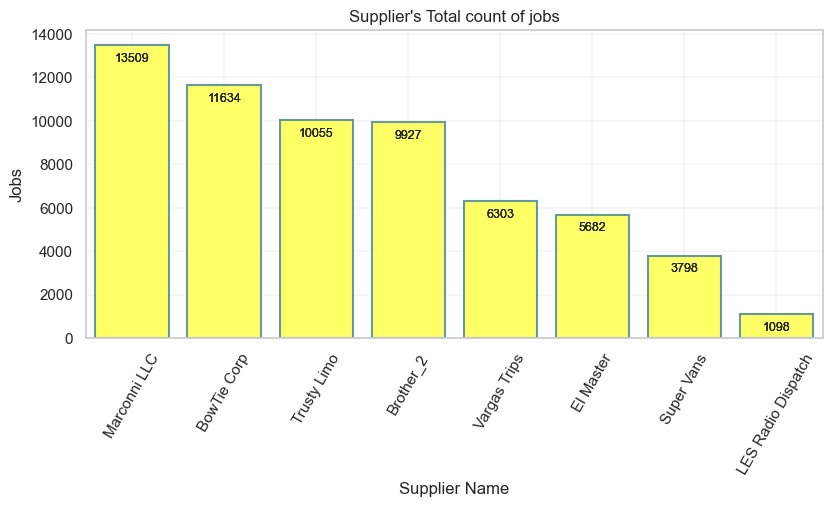

In [13]:
#1 What about starting with the volume of work for each supplier?

#DATA
group = book.groupby(book['supplier'])
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=True)
ax.bar(g1['supplier'],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Supplier\'s Total count of jobs')

ax.set(xlabel='Supplier Name', ylabel='Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



   index            supplier      mean  count
0      6        Marconni LLC  4.597354   4006
1      0         BowTie Corp  4.706941   3890
2      9         Trusty Limo  4.642026   3869
3      1           Brother_2  4.771689   3066
4      2           El Master  4.783093   2153
5     10        Vargas Trips  4.672302   2011
6      8          Super Vans  4.447095    964
7      5  LES Radio Dispatch  4.951923    104


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'El Master'),
  Text(5, 0, 'Vargas Trips'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

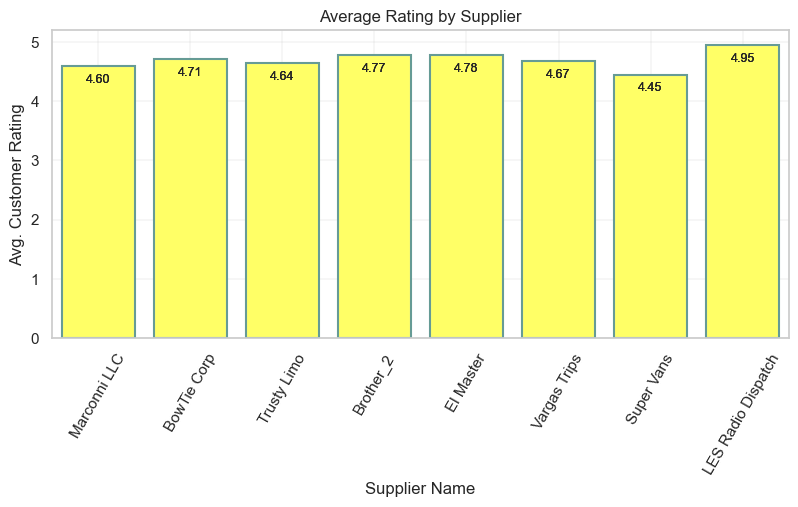

In [11]:
#12 What about the ratings for each?

#DATA
group = rb.groupby(rb['supplier'])
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Average Rating by Supplier')

ax.set(xlabel='Supplier Name', ylabel='Avg. Customer Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



TypeError: Invalid object type at position 0

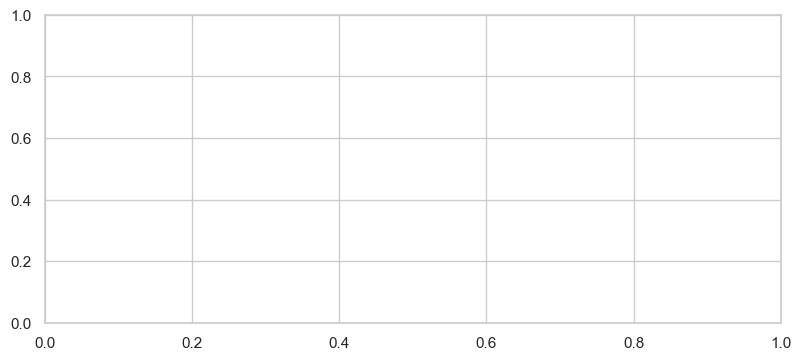

In [12]:
#When were they active?
group=book.groupby([book['pickup_date'].dt.to_period('Q')])
g_total=group.agg({'booking_id':['count']})
g_total.columns=['count_total']
g_total.reset_index(inplace=True)
#g_total=g_total[g_total['count']>100]
#g_total

group=book.groupby([book['pickup_date'].dt.to_period('Q'),book['supplier']])
g=group.agg({'booking_id':['count']})
g.columns=['count_sup']
g.reset_index(inplace=True)
#g=g[g['count']>100]

g2=pd.merge(g,g_total, how='left', left_on=['pickup_date'], right_on=['pickup_date'])
g2['sup_proportion']=(g2['count_sup']/g2['count_total'])*100

g2=g2[g['count_sup']>10]
g2.supplier.unique()
#g2

#sns.barplot(data=g2, x='pickup_date', y='sup_proportion', hue='supplier',estimator=np.sum, palette='bright', multiple='stack')

#tips = sns.load_dataset("tips")
sns.histplot(
    data=g2,
    x="pickup_date", hue="supplier",
    multiple="fill", stat="count",
    discrete=True, shrink=.8
)



#g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','in_or_outbound'], right_on=['day_in_advance_groups','in_or_outbound'])
#g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#VISUALIZATION
width = 14
height = 8
sns.set(rc = {'figure.figsize':(width, height)})


plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#, multiple='stack')#, #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
#    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
#    shrink=0.8
#)

<Axes: xlabel='size', ylabel='Proportion'>

NameError: name 'head' is not defined

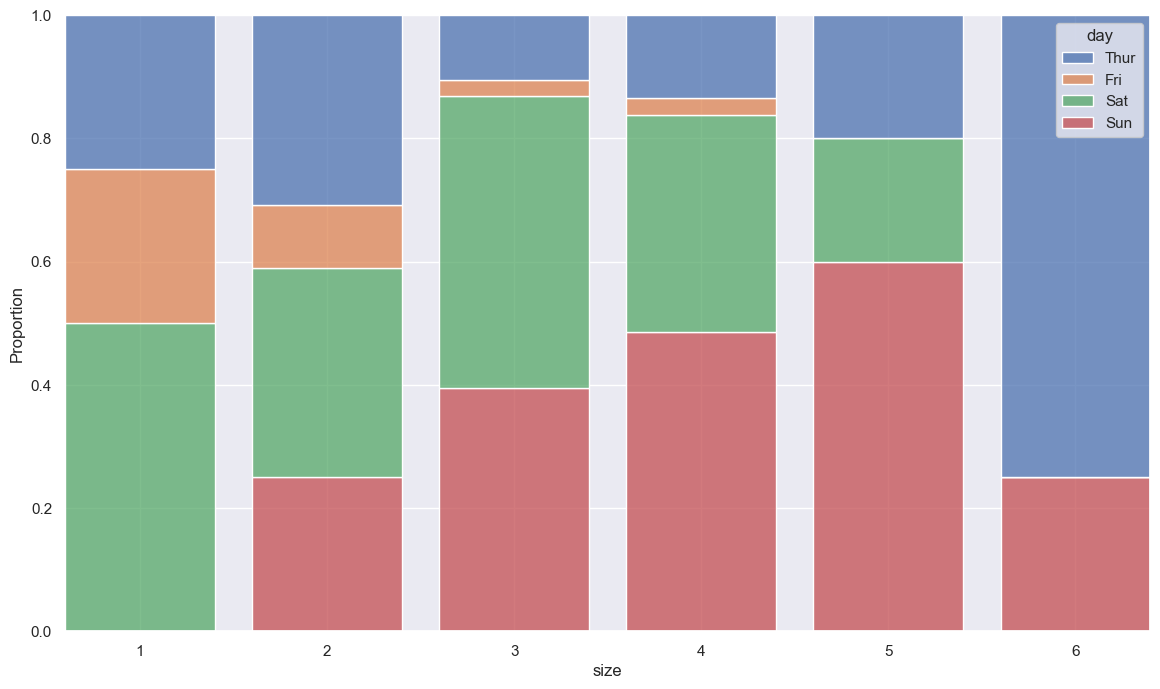

In [ ]:
tips = sns.load_dataset("tips")
sns.histplot(
    data=tips,
    x="size", hue="day",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)


In [ ]:
tips.head()
tips.dtypes


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


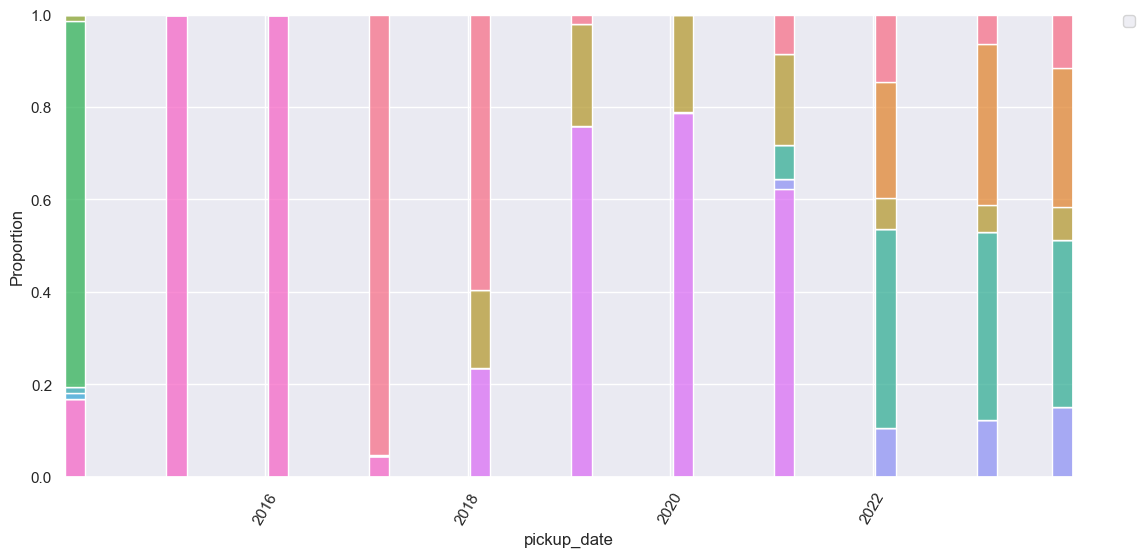

In [ ]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.year.astype(int)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.dtypes

#['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2']
sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat="proportion",
    shrink=.8
)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


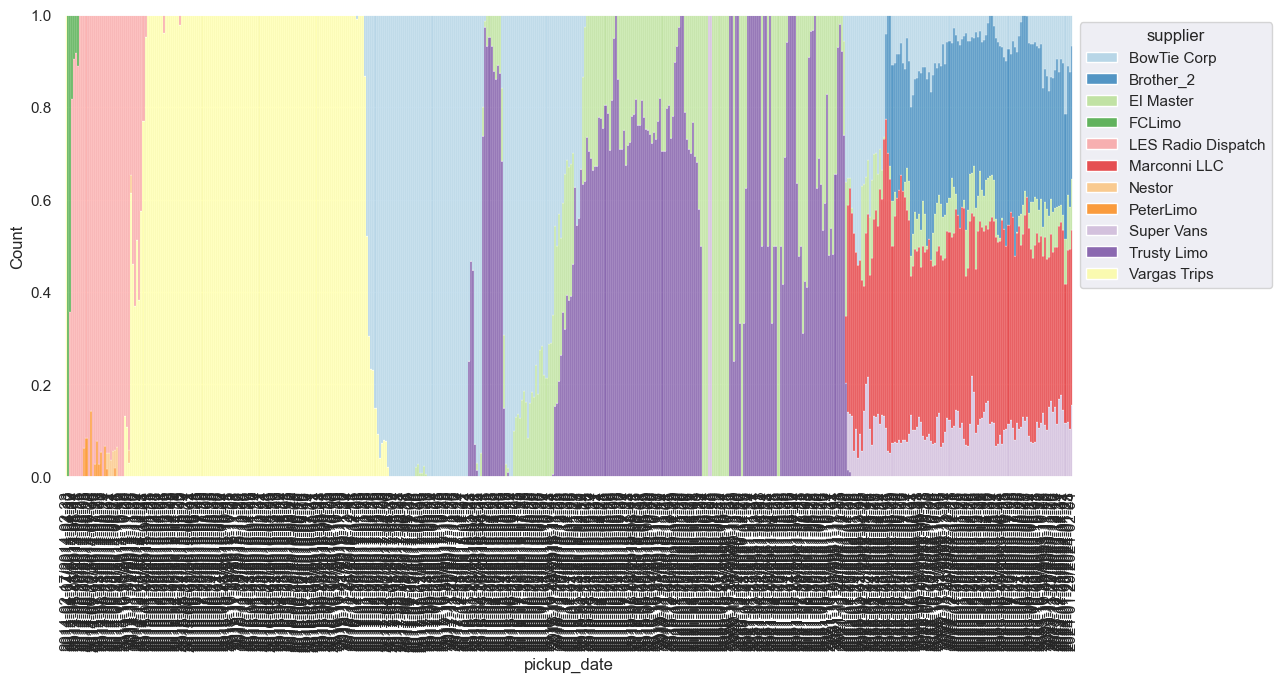

In [ ]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('W').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


[Text(0.5, 0, 'Year - Quarter'), Text(0, 0.5, '% of Work')]

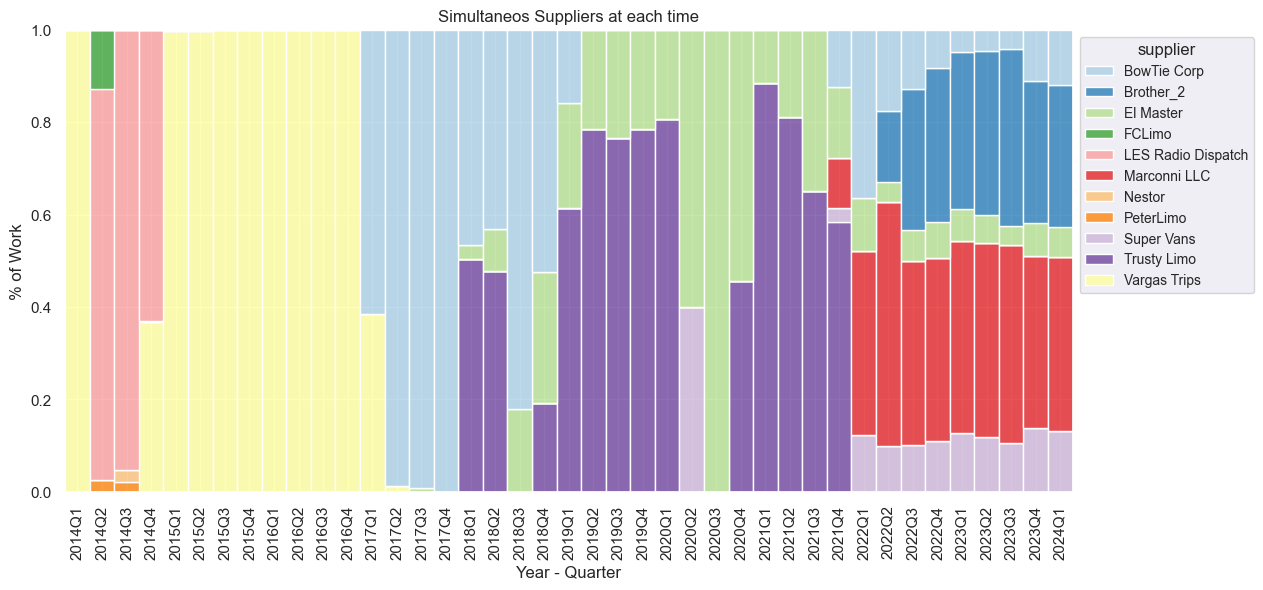

In [20]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('Q').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

ax.set_title('Simultaneos Suppliers at each time')
ax.set(xlabel='Year - Quarter', ylabel='''% of Work''')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


,supplier,vehicle_category,mean,count
31,Vargas Trips,Van,4.704545,88
27,Trusty Limo,Van,4.565111,407
4,BowTie Corp,Van,4.803738,214
23,Super Vans,Van,4.445369,961
15,LES Radio Dispatch,Sedan,5.000000,58
3,BowTie Corp,Sedan,4.666667,1320
30,Vargas Trips,Sedan,4.647202,822
8,Brother_2,Sedan,4.746547,1448
19,Marconni LLC,Sedan,4.593326,1918
11,El Master,Sedan,4.797339,977


[Text(0, -20, '4.70'),
 Text(0, -20, '4.65'),
 Text(0, -20, '4.70'),
 Text(0, -20, '4.60')]

[Text(0, -20, '4.57'),
 Text(0, -20, '4.66'),
 Text(0, -20, '4.65'),
 Text(0, -20, '4.65')]

[Text(0, -20, '4.80'),
 Text(0, -20, '4.67'),
 Text(0, -20, '4.76'),
 Text(0, -20, '4.67'),
 Text(0, -20, '4.41')]

[Text(0, -20, '4.45')]

[Text(0, -20, '5.00'), Text(0, -20, '4.89')]

[Text(0, -20, '4.75'),
 Text(0, -20, '4.79'),
 Text(0, -20, '4.91'),
 Text(0, -20, '4.58')]

[Text(0, -20, '4.59'),
 Text(0, -20, '4.61'),
 Text(0, -20, '4.76'),
 Text(0, -20, '4.07')]

[Text(0, -20, '4.80'), Text(0, -20, '4.77'), Text(0, -20, '4.60')]

(3.9, 5.1)

[[<matplotlib.axis.YTick at 0x156463fd0>,

TypeError: 'str' object is not callable

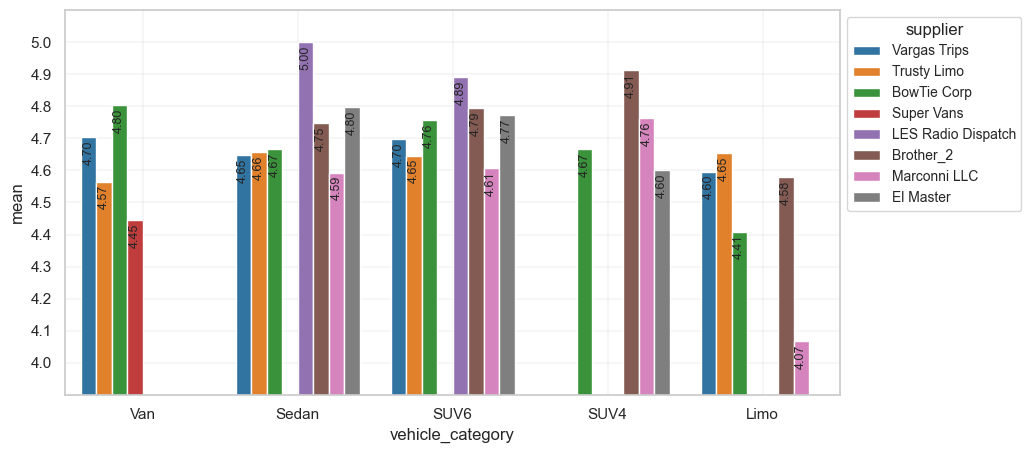

In [130]:
#DATA
group = rb.groupby([rb['supplier'],rb['vehicle_category']]) #[rb['pickup_date'].dt.year==2024]
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='vehicle_category', ascending=False, inplace=True)
g1=g1[g1['count']>=15]
g1
#g1.reset_index(inplace=True)
#print(g1)

width = 10
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
#******************
ax=sns.barplot(data=g1, x='vehicle_category', y='mean' ,hue='supplier', dodge='True',palette=sns.color_palette("tab10", n_colors=8))
##*****************
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-20, fontsize=9, rotation=90 )
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=3.9 ,ymax=5.1)
ax.set(yticks=np.arange(4, 5.1, .1))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Average Rating by Supplier and Vehicle')

ax.set(xlabel='Type of Vehicle', ylabel='Avg. Customer Rating')
#plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=0)

              supplier       mean  count
1            Brother_2  42.667068   9927
13          Super Vans  41.522686   3798
10        Marconni LLC  40.475025  13508
4            El Master  31.343639   5680
0          BowTie Corp  28.129297  11608
14         Trusty Limo  25.297665  10052
7    Golden Class Limo  23.521601     19
12           PeterLimo  23.493995     17
3               Efrain  21.802546      3
15        Vargas Trips  21.598276   6088
5               FCLimo  20.365243     20
2               Camila  19.041319      2
6             FRANKLYN  18.923611      1
9   LES Radio Dispatch  18.871108   1083
11              Nestor   8.950980     17
8          Johnny Limo   5.431597      2


<BarContainer object of 16 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Brother_2'),
  Text(1, 0, 'Super Vans'),
  Text(2, 0, 'Marconni LLC'),
  Text(3, 0, 'El Master'),
  Text(4, 0, 'BowTie Corp'),
  Text(5, 0, 'Trusty Limo'),
  Text(6, 0, 'Golden Class Limo'),
  Text(7, 0, 'PeterLimo'),
  Text(8, 0, 'Efrain'),
  Text(9, 0, 'Vargas Trips'),
  Text(10, 0, 'FCLimo'),
  Text(11, 0, 'Camila'),
  Text(12, 0, 'FRANKLYN'),
  Text(13, 0, 'LES Radio Dispatch'),
  Text(14, 0, 'Nestor'),
  Text(15, 0, 'Johnny Limo')])

Text(0.5, 1.0, 'Average Days in Advance by Supplier')

[Text(0.5, 0, 'Supplier Name'), Text(0, 0.5, 'Avg. Days in Advance')]

[Text(0, -14, '42.67'),
 Text(0, -14, '41.52'),
 Text(0, -14, '40.48'),
 Text(0, -14, '31.34'),
 Text(0, -14, '28.13'),
 Text(0, -14, '25.30'),
 Text(0, -14, '23.52'),
 Text(0, -14, '23.49'),
 Text(0, -14, '21.80'),
 Text(0, -14, '21.60'),
 Text(0, -14, '20.37'),
 Text(0, -14, '19.04'),
 Text(0, -14, '18.92'),
 Text(0, -14, '18.87'),
 Text(0, -14, '8.95'),
 Text(0, -14, '5.43')]

[Text(0, -14, '42.67'),
 Text(0, -14, '41.52'),
 Text(0, -14, '40.48'),
 Text(0, -14, '31.34'),
 Text(0, -14, '28.13'),
 Text(0, -14, '25.30'),
 Text(0, -14, '23.52'),
 Text(0, -14, '23.49'),
 Text(0, -14, '21.80'),
 Text(0, -14, '21.60'),
 Text(0, -14, '20.37'),
 Text(0, -14, '19.04'),
 Text(0, -14, '18.92'),
 Text(0, -14, '18.87'),
 Text(0, -14, '8.95'),
 Text(0, -14, '5.43')]

[Text(0, -14, '42.67'),
 Text(0, -14, '41.52'),
 Text(0, -14, '40.48'),
 Text(0, -14, '31.34'),
 Text(0, -14, '28.13'),
 Text(0, -14, '25.30'),
 Text(0, -14, '23.52'),
 Text(0, -14, '23.49'),
 Text(0, -14, '21.80'),
 Text(0, -14, '21.60'),
 Text(0, -14, '20.37'),
 Text(0, -14, '19.04'),
 Text(0, -14, '18.92'),
 Text(0, -14, '18.87'),
 Text(0, -14, '8.95'),
 Text(0, -14, '5.43')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

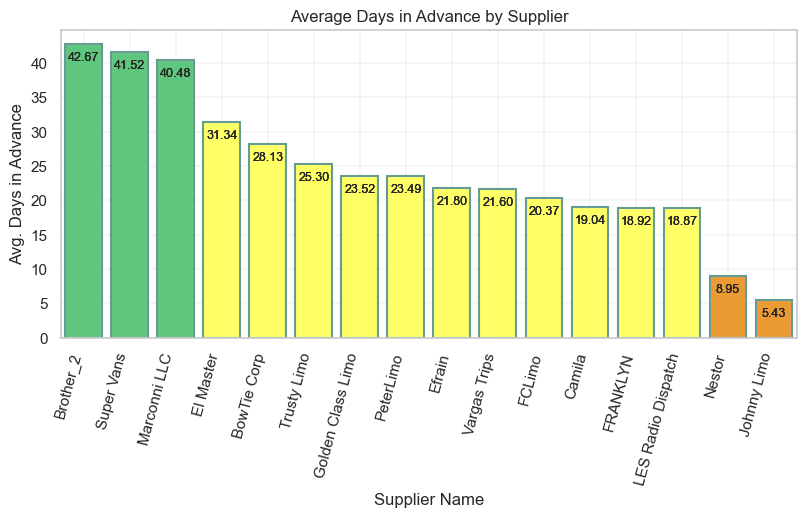

In [138]:
#12 What about the Days is advance for each Supplier?

#DATA
group = book.groupby(book['supplier'])
g1=group.agg({'days_in_advance':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='mean', ascending=False, inplace=True)
#g1=g1[g1['count']>=100]
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#5fc77d','#5fc77d','#5fc77d','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#eb9b34','#eb9b34']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')
plt.xticks(rotation=75,ha='right')
ax.set_title('Average Days in Advance by Supplier')
ax.set(xlabel='Supplier Name', ylabel='Avg. Days in Advance')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)
plt.setp(ax.patches, linewidth=1.5 )

plt.show()



y              category
m                 int32
s              category
count_bad         int64
mean            float64
count_total       int64
ratio_bad       float64
dtype: object

,y,m,s,count_bad,mean,count_total,ratio_bad
9,2019,1,Trusty Limo,1,2.000000,172,0.581395
11,2019,4,Trusty Limo,8,1.625000,720,1.111111
13,2019,5,Trusty Limo,5,1.200000,447,1.118568
15,2019,6,Trusty Limo,12,1.500000,420,2.857143
17,2019,7,Trusty Limo,9,1.666667,547,1.645338
19,2019,8,Trusty Limo,36,1.416667,1014,3.550296
21,2019,9,Trusty Limo,6,1.500000,703,0.853485
22,2019,10,Trusty Limo,5,1.800000,498,1.004016
24,2019,11,Trusty Limo,5,1.400000,525,0.952381
26,2019,12,Trusty Limo,16,1.625000,947,1.689546


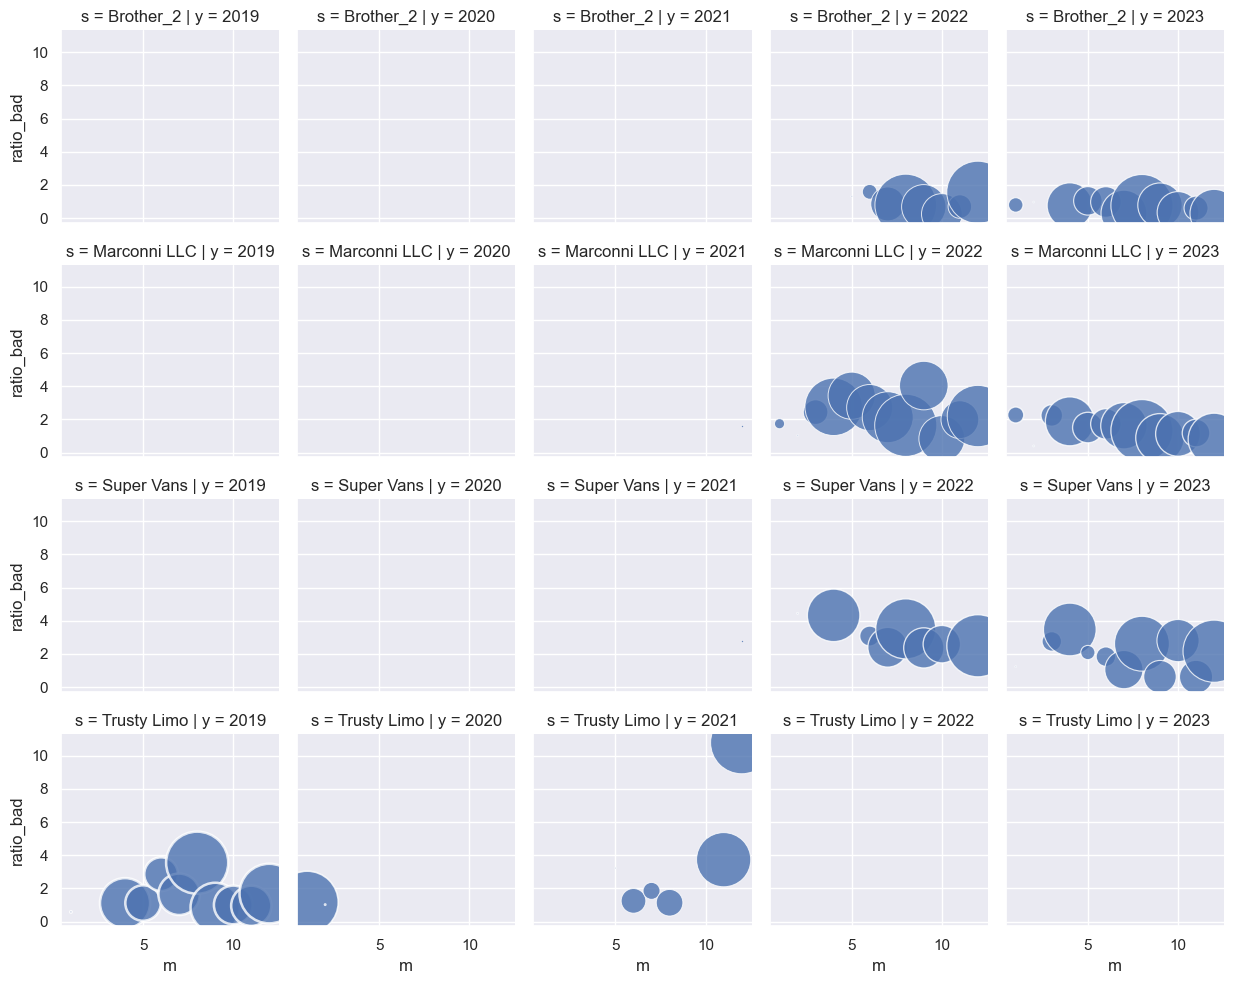

In [126]:

#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month,'supplier'])
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=['count_bad','mean']
g1.index.rename(['year','month','supplier'],inplace=True)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month','supplier'], ascending=True)
g1=g1[g1['year'].isin([2017,2018,2019,2020,2021,2022,2023])]
g1=g1[g1['supplier'].isin(['Super Vans','El Master','Trusty Limo','Marconni LLC', 'Brother_2'])]
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month,'supplier'])
g2=group.agg({'booking_id':['count']})
g2.columns=['count_total']
g2.index.rename(['year','month','supplier'],inplace=True)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month','supplier'], ascending=True)
g2=g2[g2['year'].isin([2017,2018,2019,2020,2021,2022,2023])]
g2=g2[g2['supplier'].isin(['Super Vans','El Master','Trusty Limo','Marconni LLC', 'Brother_2'])]

g3=pd.merge(g1,g2,how='left',left_on=['year','month','supplier'],right_on=['year','month','supplier'])
g3['ratio_bad']=(g3['count_bad']/g3['count_total'])*100
#g3=g3.sort_values(by=['year','month', 'supplier'], ascending=True)



#g3=g3[g3['supplier'].isin(['BowTie Corp','El Master','Trusty Limo','Marconni LLC', 'Brother_2', 'Super Vans'])]
g3=g3[g3['supplier'].isin(['Super Vans','Trusty Limo','Marconni LLC', 'Brother_2'])]
g3=g3[g3['year'].isin([2019,2020,2021,2022,2023])]
#g3['month']=g3['month'].astype('category')
g3['year']=g3['year'].astype('category')
g3['supplier']=g3['supplier'].astype('category')
#g3.sort_values(by='count_total', ascending=True)
g3.columns=['y','m','s','count_bad','mean','count_total','ratio_bad']
g3.dtypes
g3

fg= sns.FacetGrid(data=g3, col='y', row='s', height=2.5, aspect=1)
#fg.map(sns.relplot(data=g3, x="month", y="ratio_bad", size="count_total"))#, sizes=(0, 1000), alpha=.9)#, palette="Dark2")) #, height=height, aspect=(width/height)
#fg.map_dataframe(sns.relplot(data=g3, x="month", y="ratio_bad", size="count_total"))
fg.map_dataframe(sns.scatterplot, x="m", y="ratio_bad", size="count_total",sizes=(1, 2000), alpha=0.8)
#fg.map(plt.scatter, "month", 'ratio_bad')
#fg.map(sns.barplot, 'month', 'ratio_bad')#, size=g3['count_total'], sizes=(0,2000))
#fg.set(yticks=[], xlabel="Rating", ylabel="Percentage")


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

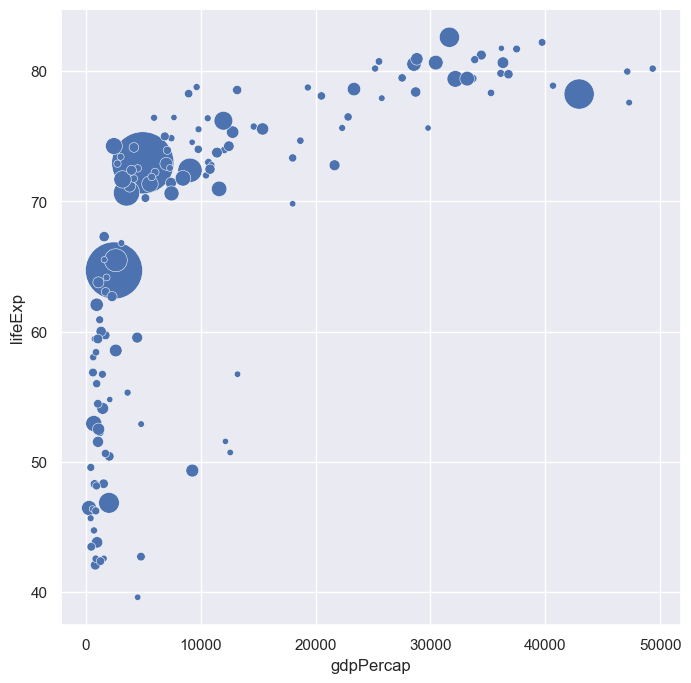

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [80]:
#!pip install gapminder # libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # import data set 

# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = gapminder.loc[gapminder.year == 2007]
 
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

data.head()